* [1.DataOverview](#1.DataOverview)
* [2.Visualization](#2.Visualization)
    * [2.1 visualization for category](#21)
    * [2.2 visualization for year/month/day](#22)
    * [2.3 visualization for Top 100,000 headline_text](#23)
    * [2.4 visualization for headline_text by year](#24)
* [3.Conclusion](#3.Conclusion)

In [1]:
import numpy as np
import pandas as pd 
import re #library to clean data
import nltk #Natural Language tool kit
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import datetime
from nltk.corpus import stopwords #to remove stopword
from nltk.stem.porter import PorterStemmer 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
os.listdir('../input/ireland-historical-news')

['w3-latnigrin-text.csv', 'irishtimes-date-text.csv']

# 1.DataOverview

'irishtimes' data size is 1,425,460,and the variables include publish_date,headline_category,and headline_text.

First I add three new variables,year,month,and day. In chapter 2,I will use these variables to do some visualization.

Moreover,I have processed the headline_text,including removing the stopword and taking main stem of each word


In [3]:
latnigrin=pd.read_csv("../input/ireland-historical-news/w3-latnigrin-text.csv")
latnigrin.head()
irishtimes=pd.read_csv("../input/ireland-historical-news/irishtimes-date-text.csv")
irishtimes.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


publish_date headline_category  \
0      19960102              news   
1      19960102              news   
2      19960102              news   
3      19960102              news   
4      19960102              news   

                                     headline_text  
0         UUP sees possibility of voting Major out  
1   Pubs targeted as curbs on smoking are extended  
2  Papers reveal secret links with O'Neill cabinet  
3      Domestic chaos as Italy takes EU presidency  
4     Learning about the star to which we owe life

In [4]:
irishtimes.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [5]:
len(irishtimes)

1425460

In [6]:
irishtimes['date']=irishtimes.publish_date.apply(lambda x:datetime.datetime.strptime(str(x),'%Y%m%d').strftime('%Y-%m-%d'))
irishtimes['year']=irishtimes.date.apply(lambda x:x.split('-')[0])
irishtimes['month']=irishtimes.date.apply(lambda x:x.split('-')[1])
irishtimes['day']=irishtimes.date.apply(lambda x:x.split('-')[2])
irishtimes.head()

publish_date headline_category  \
0      19960102              news   
1      19960102              news   
2      19960102              news   
3      19960102              news   
4      19960102              news   

                                     headline_text        date  year month day  
0         UUP sees possibility of voting Major out  1996-01-02  1996    01  02  
1   Pubs targeted as curbs on smoking are extended  1996-01-02  1996    01  02  
2  Papers reveal secret links with O'Neill cabinet  1996-01-02  1996    01  02  
3      Domestic chaos as Italy takes EU presidency  1996-01-02  1996    01  02  
4     Learning about the star to which we owe life  1996-01-02  1996    01  02

# 2.Visualization

<h3 id="21">2.1 visualization for category</h3>

From the bar chart,we know that the top 3 category is news,sport,and business respectively.And the counts of news are decreased dramatically between 2011 and 2016.The counts of category have not varied  significantly in month and day.

Text(0.5, 0, 'day')

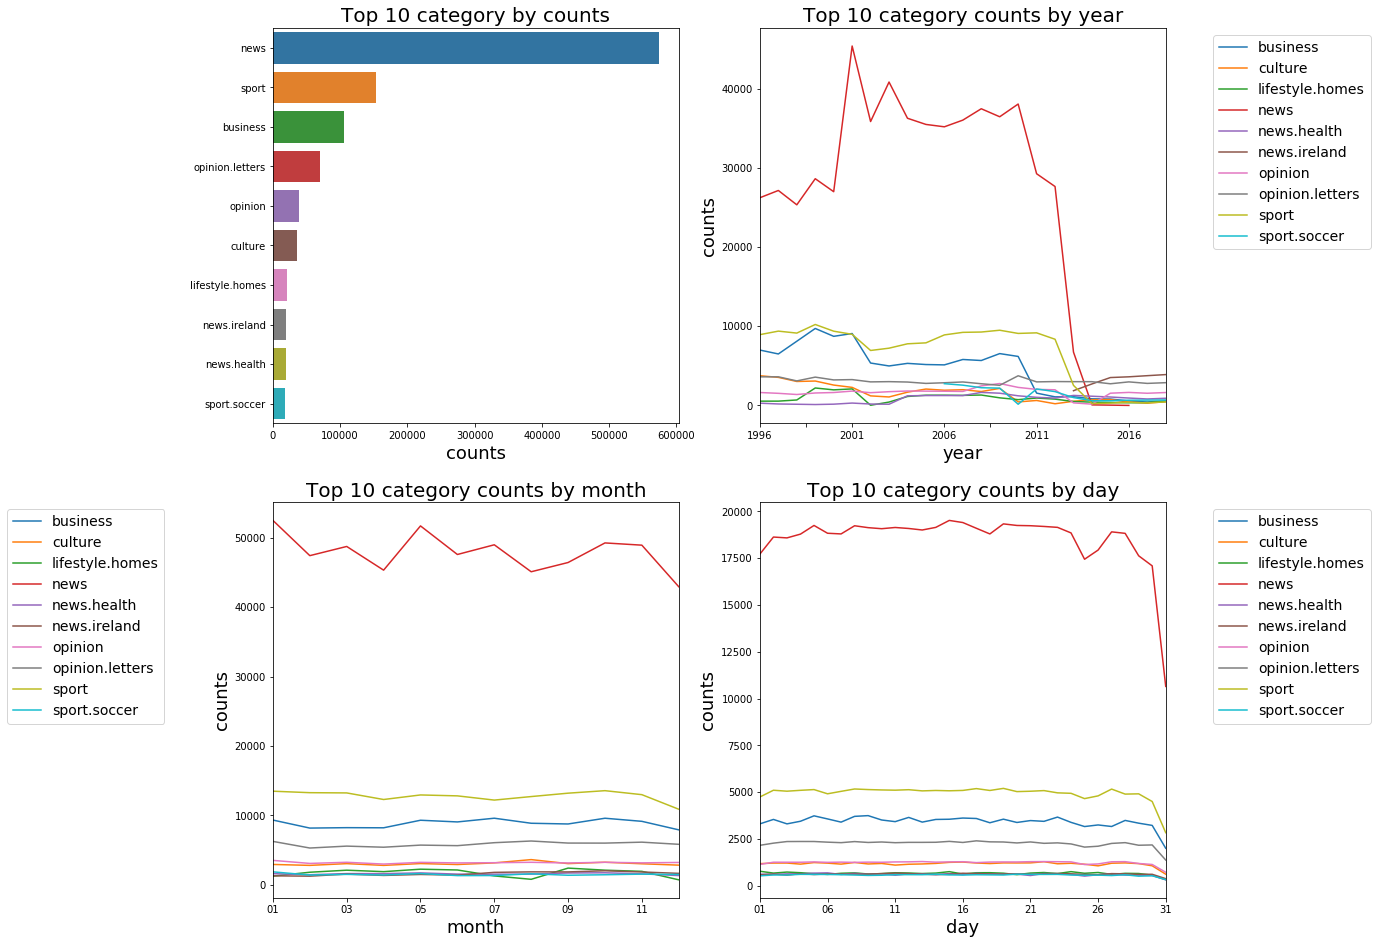

In [7]:
fig,ax=plt.subplots(2,2,figsize=(16,16))
Top10_category=irishtimes[irishtimes['headline_category'].isin(list(irishtimes.headline_category.value_counts()[:10].index[:10]))]
sns.barplot(y=Top10_category.headline_category.value_counts().index,x=Top10_category.headline_category.value_counts(),ax=ax[0,0])
ax[0,0].set_title("Top 10 category by counts",size=20)
ax[0,0].set_xlabel('counts',size=18)
ax[0,0].set_ylabel('')

Top10_category.groupby(['year','headline_category'])['headline_category'].agg('count').unstack('headline_category').plot(ax=ax[0,1])
ax[0,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.10,1))
ax[0,1].set_title("Top 10 category counts by year",size=20)
ax[0,1].set_ylabel('counts',size=18)
ax[0,1].set_xlabel('year',size=18)

Top10_category.groupby(['month','headline_category'])['headline_category'].agg('count').unstack('headline_category').plot(ax=ax[1,0])
ax[1,0].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(-0.25,1))
ax[1,0].set_title("Top 10 category counts by month",size=20)
ax[1,0].set_ylabel('counts',size=18)
ax[1,0].set_xlabel('month',size=18)

Top10_category.groupby(['day','headline_category'])['headline_category'].agg('count').unstack('headline_category').plot(ax=ax[1,1])
ax[1,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.10,1))
ax[1,1].set_title("Top 10 category counts by day",size=20)
ax[1,1].set_ylabel('counts',size=18)
ax[1,1].set_xlabel('day',size=18)

<h3 id="22">2.2 visualization for year/month/day</h3>

Text(0, 0.5, 'counts')

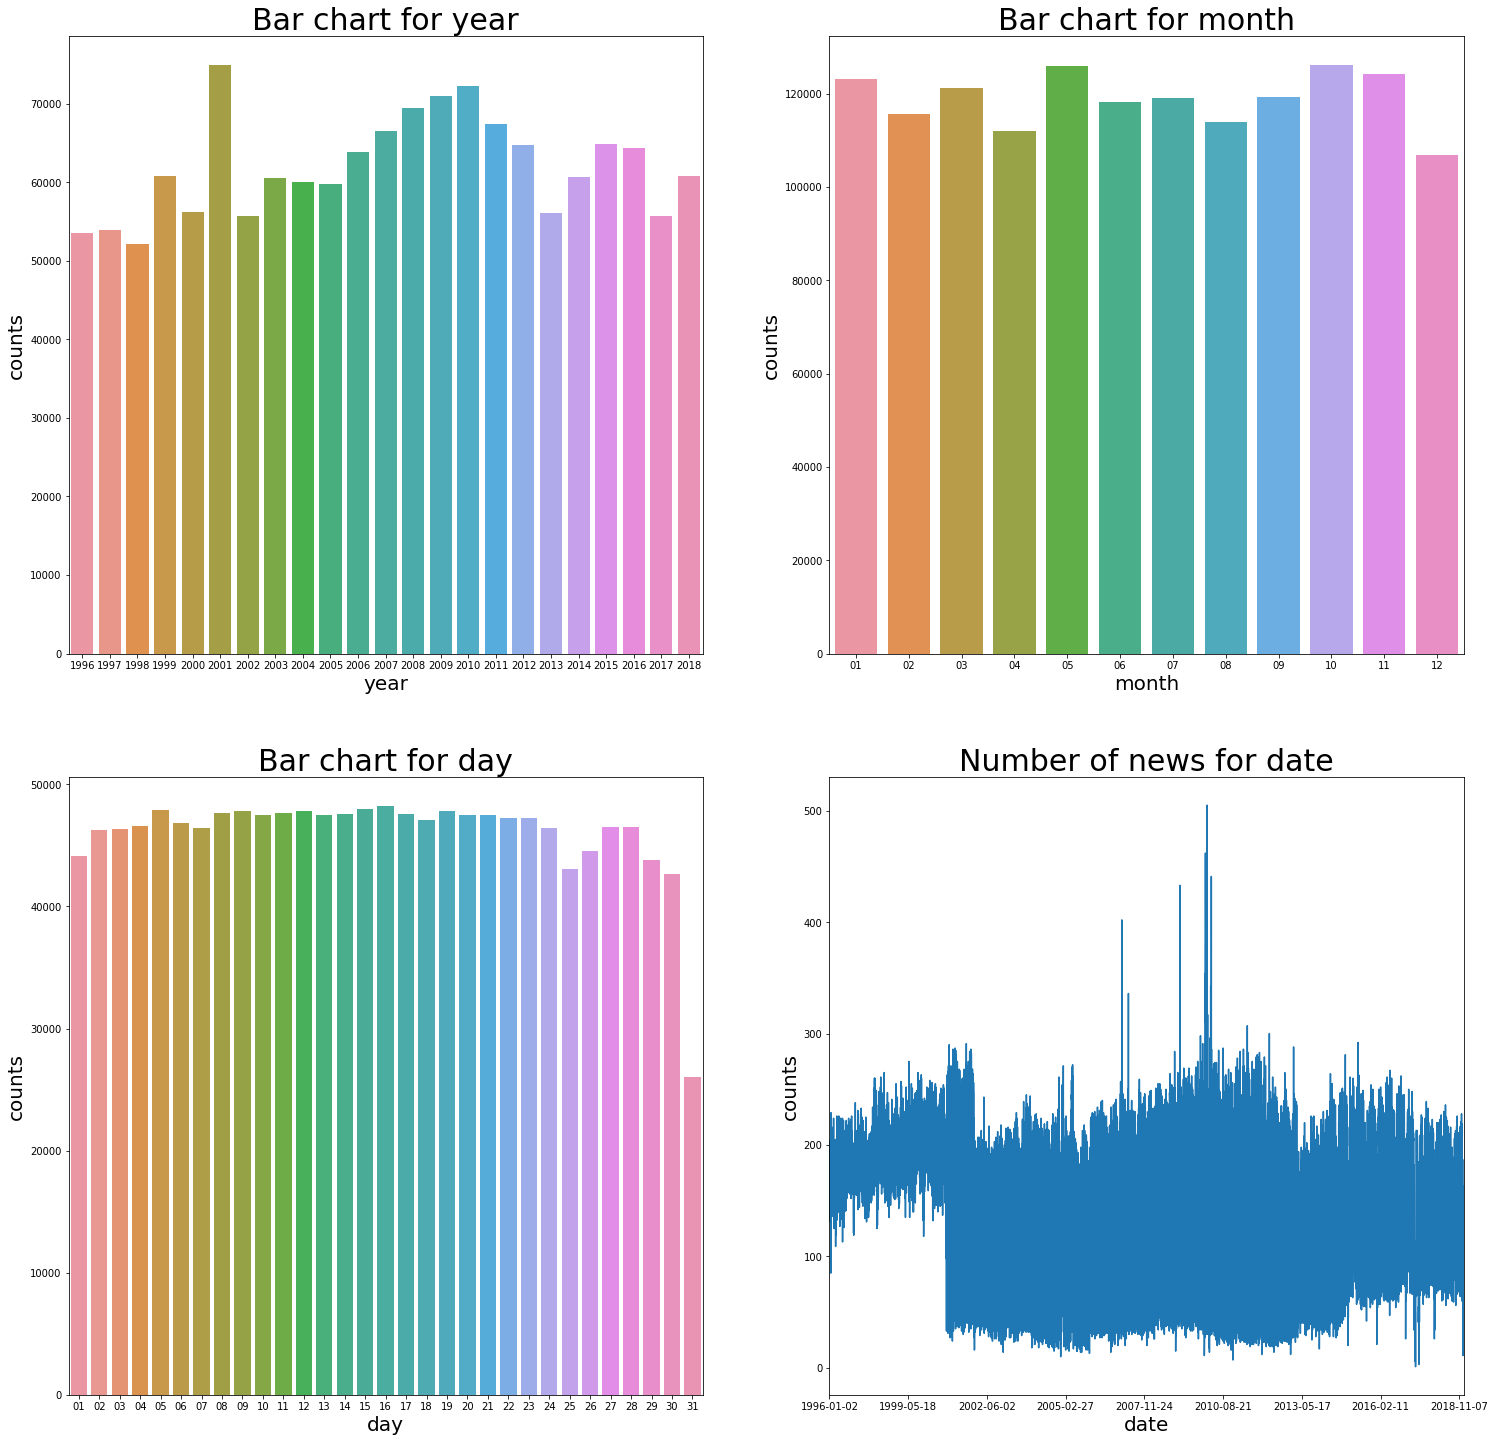

In [8]:
fig,ax=plt.subplots(2,2,figsize=(25,25))
sns.barplot(x=irishtimes.year.value_counts().index,y=irishtimes.year.value_counts(),ax=ax[0,0])
ax[0,0].set_title("Bar chart for year",size=30)
ax[0,0].set_xlabel('year',size=20)
ax[0,0].set_ylabel('counts',size=20)

sns.barplot(x=irishtimes.month.value_counts().index,y=irishtimes.month.value_counts(),ax=ax[0,1])
ax[0,1].set_title("Bar chart for month",size=30)
ax[0,1].set_xlabel('month',size=20)
ax[0,1].set_ylabel('counts',size=20)

sns.barplot(x=irishtimes.day.value_counts().index,y=irishtimes.day.value_counts(),ax=ax[1,0])
ax[1,0].set_title("Bar chart for day",size=30)
ax[1,0].set_xlabel('day',size=20)
ax[1,0].set_ylabel('counts',size=20)

irishtimes.groupby(['date'])['headline_category'].agg('count').plot(ax=ax[1,1])
ax[1,1].set_title("Number of news for date",size=30)
ax[1,1].set_xlabel('date',size=20)
ax[1,1].set_ylabel('counts',size=20)

<h3 id="23">2.3 visualization for Top 100,000 headline_text</h3>

Since it need to take so much time to conduct all headline_text.I only conduct the top 100,000 data in this kernel.

In [9]:
irishtimes_headline_text=irishtimes[:100000]
headline_text_new=[]#Initialize empty array to append clean text
for i in range(len(irishtimes_headline_text)):
	headline=re.sub('[^a-zA-Z]',' ',irishtimes_headline_text['headline_text'][i]) 
	headline=headline.lower() #convert to lower case
	headline=headline.split() #split to array(default delimiter is " ")
	ps=PorterStemmer() #creating porterStemmer object to take main stem of each word
	headline=[ps.stem(word) for word in headline if not word in set(stopwords.words('english'))] #loop for stemming each word  in string array at ith row
	headline_text_new.extend(headline)


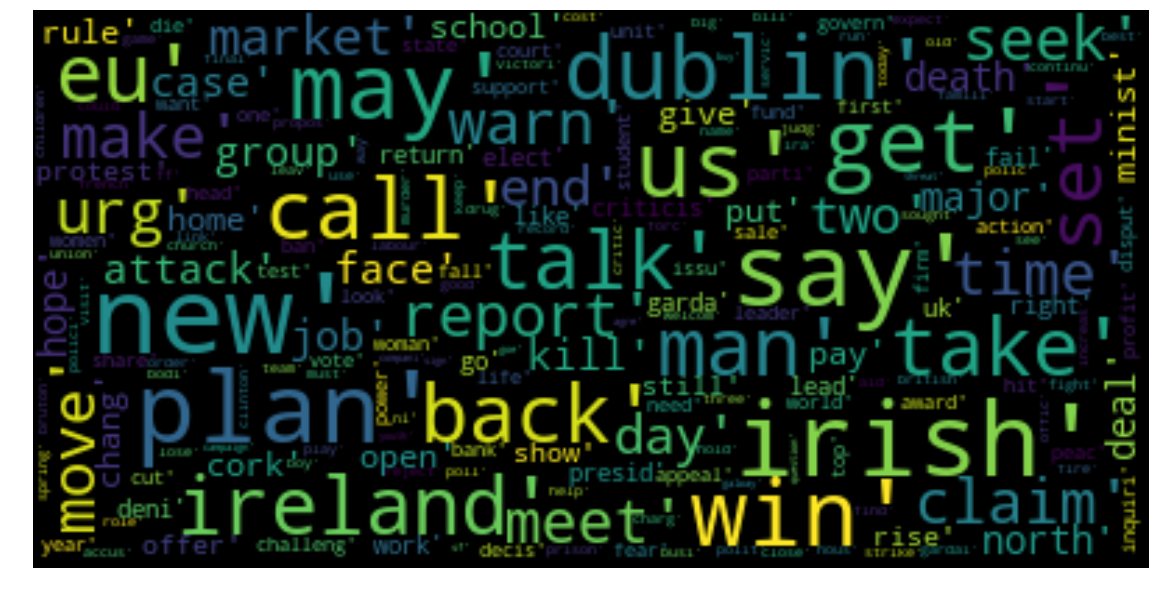

In [10]:

wordcloud = WordCloud(background_color="black",max_words=200,max_font_size=40,random_state=10).generate(str(headline_text_new))

plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3 id="24">2.4 visualization for headline_text by year</h3>

In [11]:
def headline_by_year(year):
    headline_text_new=[]#Initialize empty array to append clean text
    irishtimes_headline_text=irishtimes[irishtimes.year==str(year)]
    headline=None
    for i in range(len(irishtimes_headline_text)):
        headline=re.sub('[^a-zA-Z]',' ',irishtimes_headline_text['headline_text'][irishtimes_headline_text.index[i]]) 
        headline=headline.lower() #convert to lower case
        headline=headline.split() #split to array(default delimiter is " ")
        ps=PorterStemmer() #creating porterStemmer object to take main stem of each word
        headline=[ps.stem(word) for word in headline if not word in set(stopwords.words('english'))] #loop for stemming each word  in string array at ith row
        headline_text_new.extend(headline)
    wordcloud = WordCloud(background_color="black",random_state=40,max_words=200,max_font_size=40).generate(str(headline_text_new))
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Wordcloud of headline in "+str(year),size=20)
    plt.axis("off")
    plt.show()

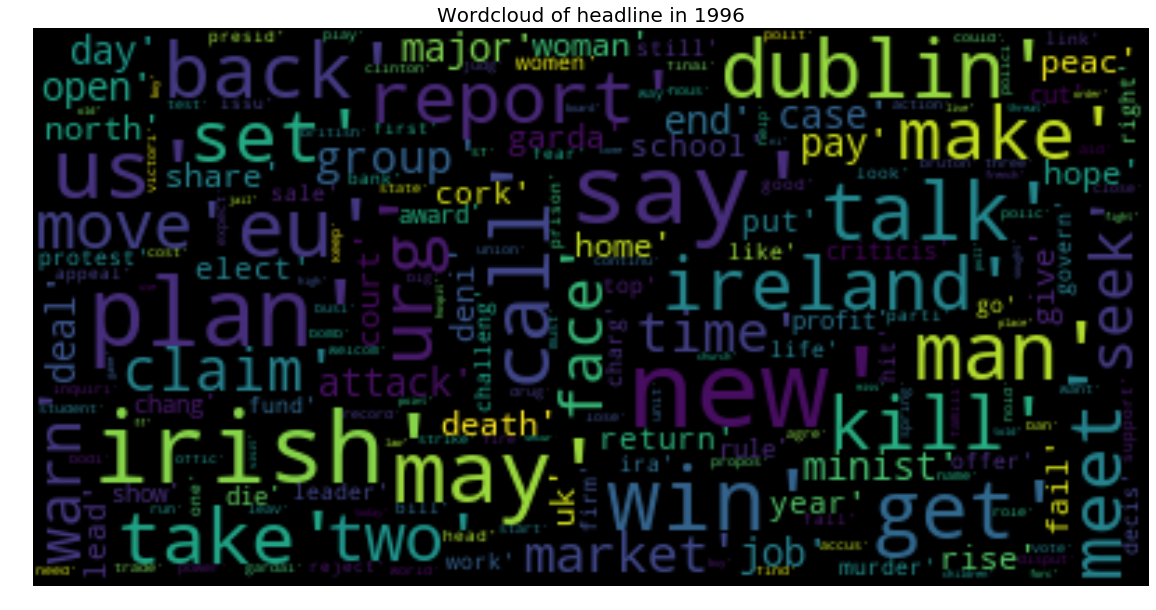

In [12]:
headline_by_year(1996)

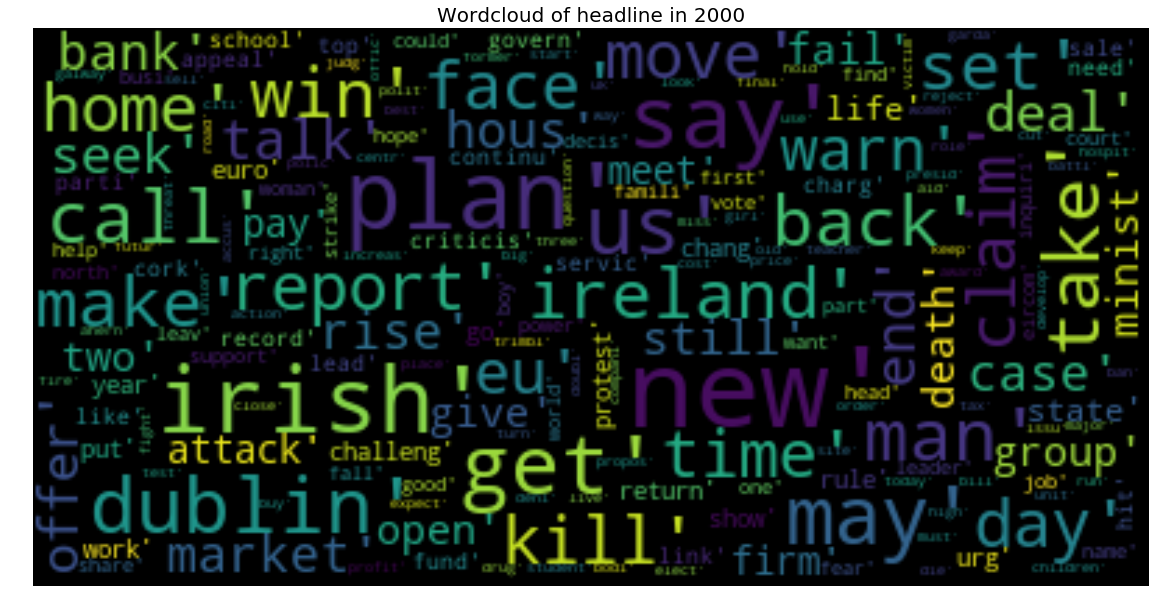

In [13]:
headline_by_year(2000)

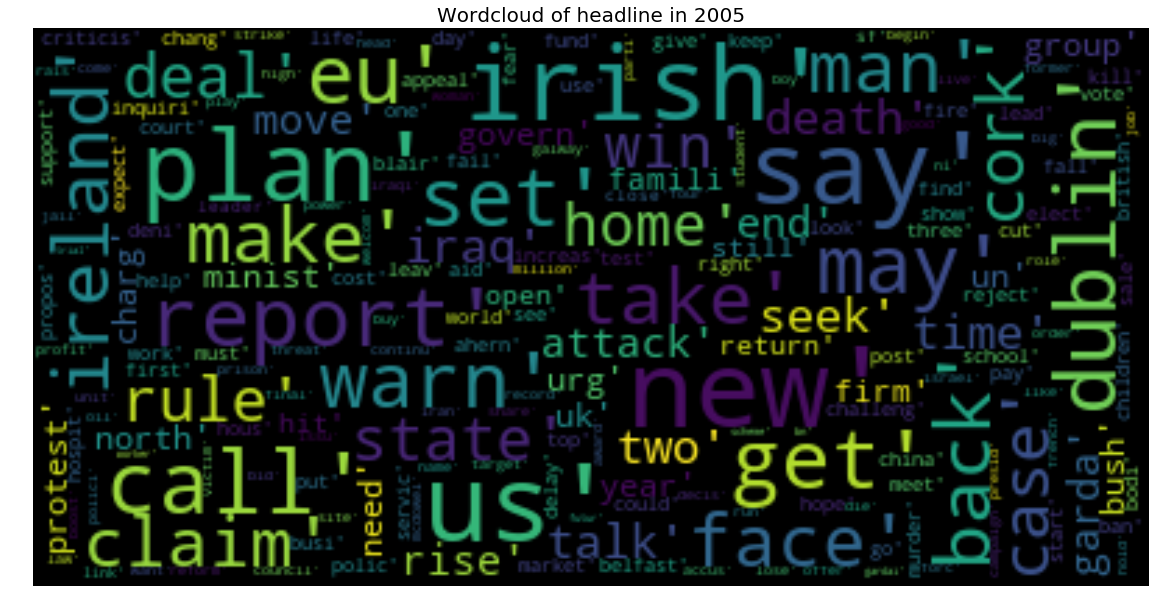

In [14]:
headline_by_year(2005)

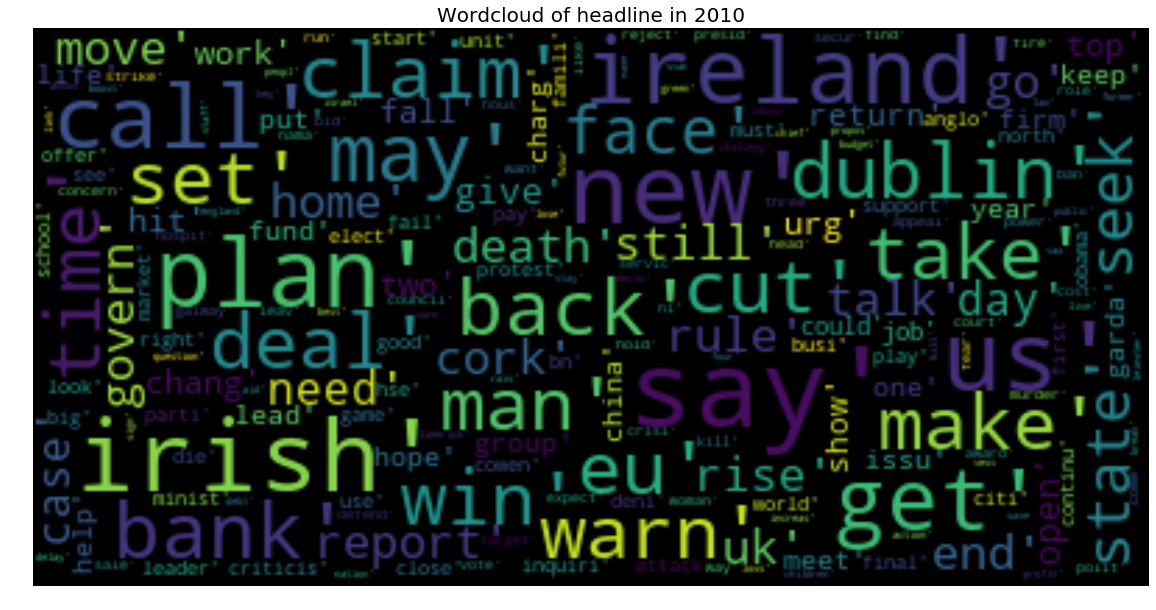

In [15]:
headline_by_year(2010)

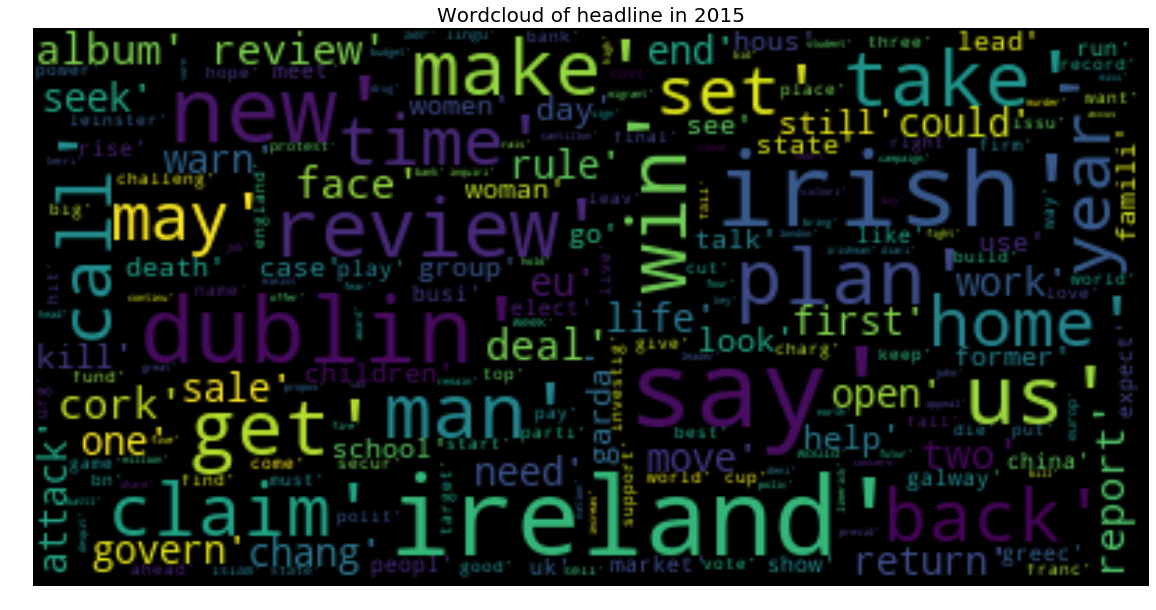

In [16]:
headline_by_year(2015)

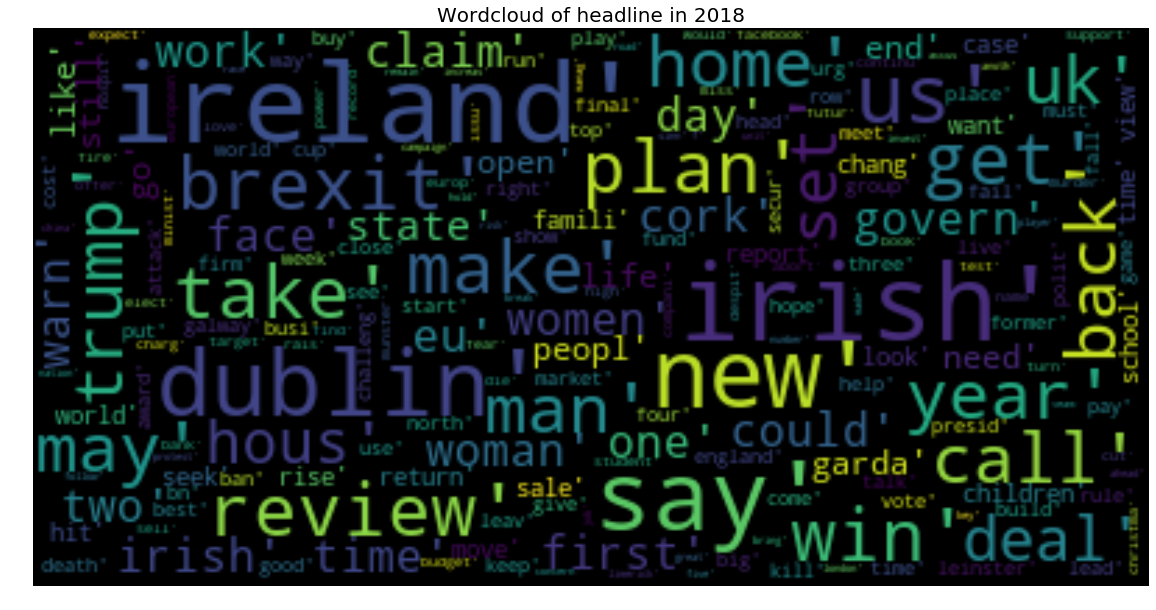

In [17]:
headline_by_year(2018)

# 3.Conclusion

1.The counts of news are decreased dramatically between 2011 and 2016.The counts of category have not varied significantly in month and day.

2.According to the Word Cloud in 2.3,we know that most of headline include dublin,irrish,ireland,and so on.

3.According to the Word Cloud in 2018,there is a special word 'brexit'.